In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
dados_brutos = pd.read_csv('VendasBicicletas.csv')
dados_brutos.set_index('ID', inplace=True)
print(dados_brutos)

           Modelo       Cor  Preço (R$) Data da Venda
ID                                                   
1   Speedster 300      Azul        2450    03/02/2025
2    Mountain Pro     Preto        3299    14/03/2025
3      Urban Lite  Vermelho        1890    22/03/2025
4   Speedster 300     Verde        2450    28/03/2025
5    Mountain Pro    Branco        3299    03/04/2025
6      Urban Lite      Azul        1890    07/04/2025
7    Adventure XT     Cinza        2720    10/04/2025
8   Speedster 300     Preto        2450    15/04/2025
9    Mountain Pro      Azul        3299    16/04/2025
10   Adventure XT     Verde        2720    18/04/2025
11     Urban Lite    Branco        1890           NaN
12   Adventure XT     Preto        2720    28/04/2025
13  Speedster 300  Vermelho        2450    02/05/2025
14   Mountain Pro     Cinza        3299           NaN
15   Adventure XT     Azula        2720    16/05/2025
16     Urban Lite     Verde        1890    20/05/2025
17  Speedster 300    Branco 

In [151]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Modelo         20 non-null     object
 1   Cor            20 non-null     object
 2   Preço (R$)     20 non-null     int64 
 3   Data da Venda  18 non-null     object
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [152]:
dados_limpos = dados_brutos.copy()

dados_limpos.loc[11, 'Data da Venda'] = '23/04/2025'
dados_limpos.loc[14, 'Data da Venda'] = '09/05/2025' 

dados_limpos['Cor'] = dados_limpos['Cor'].replace({'Azula':'Azul', 'Cinzos':'Cinza'})

dados_limpos['Data da Venda'] = pd.to_datetime(dados_limpos['Data da Venda'], format='%d/%m/%Y')

print(dados_limpos)

           Modelo       Cor  Preço (R$) Data da Venda
ID                                                   
1   Speedster 300      Azul        2450    2025-02-03
2    Mountain Pro     Preto        3299    2025-03-14
3      Urban Lite  Vermelho        1890    2025-03-22
4   Speedster 300     Verde        2450    2025-03-28
5    Mountain Pro    Branco        3299    2025-04-03
6      Urban Lite      Azul        1890    2025-04-07
7    Adventure XT     Cinza        2720    2025-04-10
8   Speedster 300     Preto        2450    2025-04-15
9    Mountain Pro      Azul        3299    2025-04-16
10   Adventure XT     Verde        2720    2025-04-18
11     Urban Lite    Branco        1890    2025-04-23
12   Adventure XT     Preto        2720    2025-04-28
13  Speedster 300  Vermelho        2450    2025-05-02
14   Mountain Pro     Cinza        3299    2025-05-09
15   Adventure XT      Azul        2720    2025-05-16
16     Urban Lite     Verde        1890    2025-05-20
17  Speedster 300    Branco 

In [153]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Modelo         20 non-null     object        
 1   Cor            20 non-null     object        
 2   Preço (R$)     20 non-null     int64         
 3   Data da Venda  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.3+ KB


In [154]:
precos = np.array(dados_limpos['Preço (R$)'])
preco_media = np.mean(precos)
preco_max = np.max(precos)
preco_min = np.min(precos)

print(f"O preço médio das bicicletas vendidas é: R$ {f'{preco_media:,.2f}'.replace(',', '_').replace('.', ',').replace('_', '.')}")
print(f"O preço máximo das bicicletas vendidas é: R$ {f'{preco_max:,.2f}'.replace(',', '_').replace('.', ',').replace('_', '.')}")
print(f"O preço mínimo das bicicletas vendidas é: R$ {f'{preco_min:,.2f}'.replace(',', '_').replace('.', ',').replace('_', '.')}")

O preço médio das bicicletas vendidas é: R$ 2.589,75
O preço máximo das bicicletas vendidas é: R$ 3.299,00
O preço mínimo das bicicletas vendidas é: R$ 1.890,00


In [155]:
vendas_por_cor = dados_limpos['Cor'].value_counts()
pd.DataFrame(vendas_por_cor)

,count
Cor,
Azul,4
Branco,4
Preto,3
Vermelho,3
Verde,3
Cinza,3


In [156]:
vendas_por_modelo = dados_limpos['Modelo'].value_counts()
pd.DataFrame(vendas_por_modelo)

,count
Modelo,
Speedster 300,5
Mountain Pro,5
Urban Lite,5
Adventure XT,5


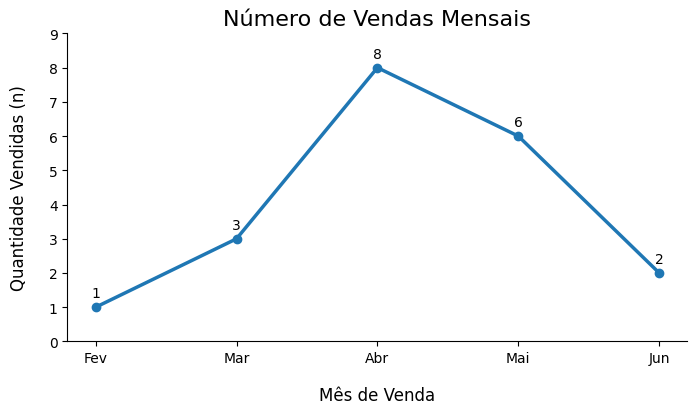

In [170]:
vendas_por_mes = dados_limpos['Data da Venda'].dt.month.value_counts().sort_index()
mapa_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
ticks_numericos = vendas_por_mes.index
ticks_texto = [mapa_meses[int(mes)] for mes in ticks_numericos]

plt.figure(figsize=(8, 4))
plt.plot(vendas_por_mes, marker='o', linewidth=2.5)
plt.title('Número de Vendas Mensais', fontsize=16)
plt.xlabel('Mês de Venda', fontsize=12, labelpad=15)
plt.ylabel('Quantidade Vendidas (n)', fontsize=12, labelpad=15)
plt.xticks(ticks=ticks_numericos, labels=ticks_texto)

for mes, qtd in vendas_por_mes.items():
    label_texto = f"{int(qtd)}"
    plt.text(mes, qtd + 0.2, label_texto, ha='center', va='bottom', fontsize=10)

plt.ylim(0, vendas_por_mes.max() + 1) 

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

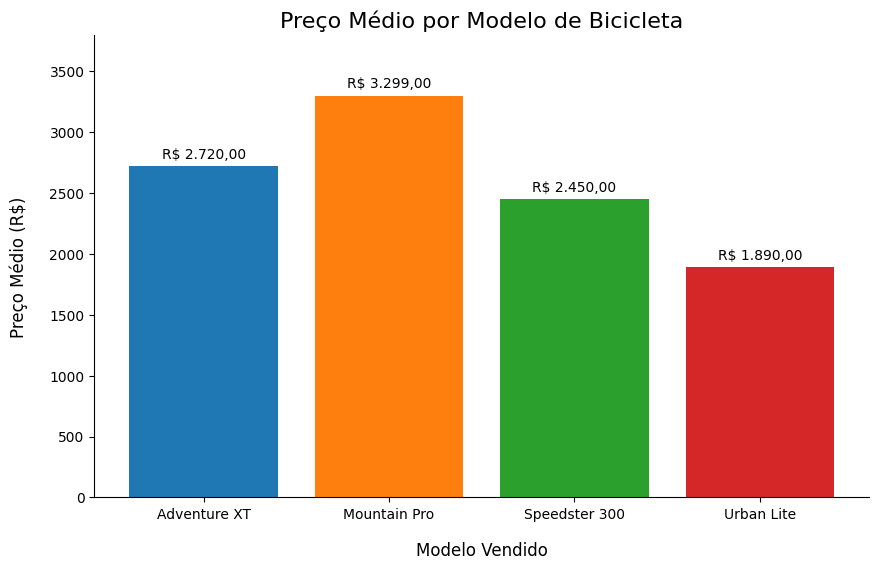

In [171]:
media_por_modelo = dados_limpos.groupby('Modelo')['Preço (R$)'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(media_por_modelo.index, media_por_modelo.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) # Cores diferentes

plt.title('Preço Médio por Modelo de Bicicleta', fontsize=16)
plt.ylabel('Preço Médio (R$)', fontsize=12, labelpad=15)
plt.xlabel('Modelo Vendido', fontsize=12, labelpad=15)

for bar in bars:
    yval = bar.get_height()
    label_texto = f"R$ {f'{yval:,.2f}'.replace(',', '_').replace('.', ',').replace('_', '.')}"
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 40, label_texto, ha='center', va='bottom', fontsize=10)

plt.ylim(0, media_por_modelo.max() * 1.15) 

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()